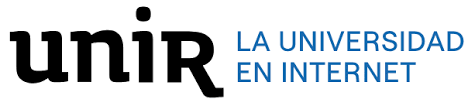

<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">

<h2 style="text-align: center; font-weight: bold;">Asignatura: Percepción Computacional</h2>


<h2 style="text-align: center; font-weight: bold;">Actividad grupal: Evaluación de la segmentación</h2>

<h2 style="text-align: center; font-weight: bold;">Equipo 1073-H:</h2>

<h3 style="text-align: center;">Diego Alexis Galván Sandoval</h3>
<h3 style="text-align: center;">Marcos Miguel Lopéz Hernández</h3>
<h3 style="text-align: center;">Eduardo Alberto Domínguez Fontes</h3>
<h3 style="text-align: center;">Dennis Martin Herrera Herrera</h3>


<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">


## Objetivos

El objetivo de este trabajo es aprender a construir y evaluar el rendimiento de uno o más segmentadores. Esta actividad permitirá consolidar los conceptos sobre segmentación de imágenes aprendidos.


## Métodos de Segmentación 

## Referencias
1. Russell, B. C., Torralba, A., Murphy, K. P., & Freeman, W. T. (2008). LabelMe: A database and web-based tool for image annotation. International Journal of Computer Vision, 77(1-3), 157-173.